## <div style="text-align: center;">Complex NetworkAnalysis - Assignment 2</div>

## 1. Create a function that takes adjacency matrix as an input.

In [1]:
#import required libraries for this lab
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- ### Build a adjaceny matrix from file

In [2]:
adjacency_matrix = np.loadtxt("adjacency_list.txt")
print(adjacency_matrix)

G = nx.Graph(adjacency_matrix)

[[0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


- ### Check if it’s a regular graph or not. 
  ####  a graph is considered regular when each vertex has the same number of neighbors

In [3]:
is_regular = nx.is_regular(G)
if is_regular:
    print("is Graph Regular : ", "The graph is regular.")
else:
    print("is Graph Regular : ", "The graph is not regular.")

is Graph Regular :  The graph is not regular.


- ### Check if it’s an undirected graph or not
  #### A directed graph is when edges are in a specifc direction usually directed with arrow, we build the Graph using Graph() so this will be undirected graph, if we build using DiGraph() then it will be a Directed Graph

In [4]:
is_directed = G.is_directed()

if is_directed:
    print("The graph is directed.")
else:
    print("The graph is undirected.")

The graph is undirected.


- ### Find the number of edges in the graph

In [5]:
num_edges = G.number_of_edges()

print(f"The number of edges in the graph is: {num_edges}")

The number of edges in the graph is: 7


- ### Plot the graph with circular layout

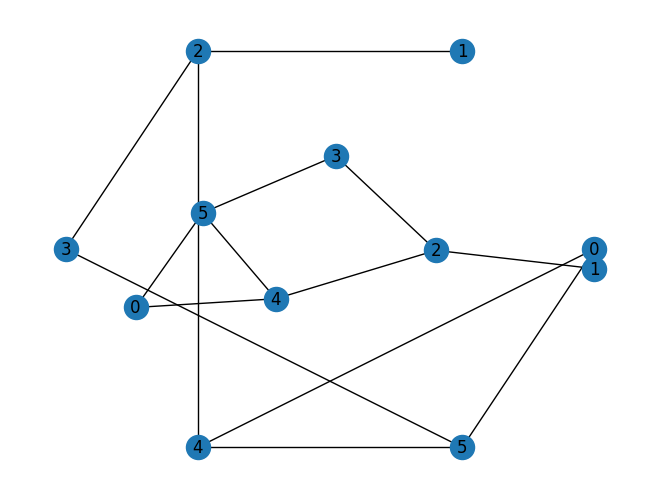

In [6]:
pos=nx.circular_layout(G)
nx.draw(G,pos=pos,with_labels=True)
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels=True)

## 2. Create a directed graph with 6 nodes and 9 directed edges with no self loops. Find the number of common neighbours between any two given nodes


The number of nodes in the graph is: 6
The number of edges in the graph is: 9
The common neighbors between nodes V1 and V5 are: ['V6']
The common neighbors between nodes V2 and V3 are: ['V5']


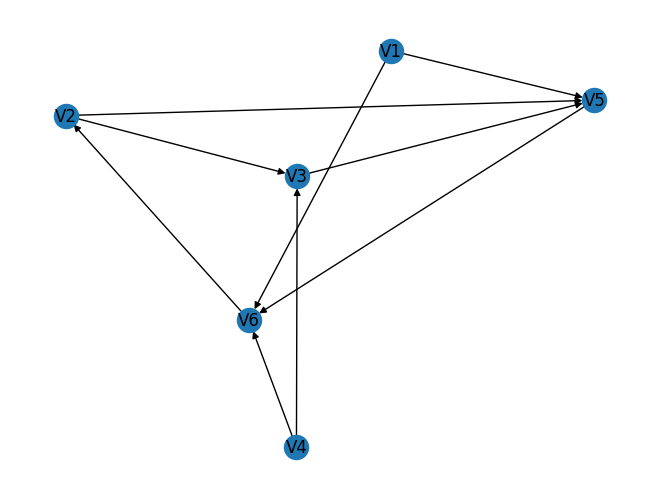

In [7]:
def findCommonNeighbors_between_two_nodes(G,node1,node2):
    #we cannot use common_neigbors for a Digraph, we need to find the predecessors and successors with the below code
    common_predecessors = set(G.predecessors(node1)).intersection(G.predecessors(node2)) #incomming node
    common_successors = set(G.successors(node1)).intersection(G.successors(node2)) #outgoing node

    # take a union between the two, it means get the common nodes for the two.
    common_neighbors = common_predecessors.union(common_successors)
    print(f"The common neighbors between nodes {node1} and {node2} are: {list(common_neighbors)}")    

G = nx.DiGraph() # first we are making a directed graph
#we have a clear requirement that we should not be using self loop, example we should not use ('V1','V1'), this will create a self loop
G.add_edges_from([('V1', 'V6'), ('V1', 'V5'), ('V2', 'V5'), ('V3', 'V5'), ('V4', 'V6'), ('V4', 'V3'), ('V5', 'V6'), ('V6', 'V2'), ('V2', 'V3')])

print(f"The number of nodes in the graph is: {G.number_of_nodes()}")
print(f"The number of edges in the graph is: {G.number_of_edges()}")


# change the value below, to see the common neighbors between any two nodes
common_neighbors = findCommonNeighbors_between_two_nodes(G,'V1','V5')

common_neighbors = findCommonNeighbors_between_two_nodes(G,'V2','V3')


pos=nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels=True)

## 3. Create a citation network that is acyclic, with Nodes as paper id; citation as the edge

In [8]:
citation_graph = nx.Graph()

# List of paper ids
paper_ids = [101, 204, 308, 405, 507]

citation_graph.add_nodes_from(paper_ids)

# Add edges between different paper ids
citation_graph.add_edges_from([(101,204),(507, 204), (507, 308), (204, 405), (405, 507)])


### a. Compute the Co-citation network adjacency matrix
#### We will build the adjacency matrix from the citation_graph that was built in previous step, this will convert the relationship into matrix form

In [9]:
cocitation_matrix = nx.adjacency_matrix(citation_graph)
print("Co-citation Network Adjacency Matrix:")
print(cocitation_matrix.todense())

Co-citation Network Adjacency Matrix:
[[0 1 0 0 0]
 [1 0 0 1 1]
 [0 0 0 0 1]
 [0 1 0 0 1]
 [0 1 1 1 0]]


### b. Given two paper ids I and J, find how many common papers are cited by both papers

In [10]:
def get_common_citations(pid_1, pid_2):
    common_citations = set()

    # Iterate over citations of pid_1 and then check if pid_2 exist, if yes add to set
    for citation_id in citation_graph[pid_1]:
        if citation_id in citation_graph[pid_2]:
            common_citations.add(citation_id)

    print(f"The common citations between {paper_id_1} and {paper_id_2}: {common_citations}")
    return len(common_citations)

paper_id_1 = 204
paper_id_2 = 507
common_citations_count = get_common_citations(paper_id_1, paper_id_2)
print(f"Number of common citations between {paper_id_1} and {paper_id_2}: {common_citations_count}")

paper_id_1 = 507
paper_id_2 = 405
common_citations_count = get_common_citations(paper_id_1, paper_id_2)
print(f"Number of common citations between {paper_id_1} and {paper_id_2}: {common_citations_count}")

paper_id_1 = 101
paper_id_2 = 308
common_citations_count = get_common_citations(paper_id_1, paper_id_2)
print(f"Number of common citations between {paper_id_1} and {paper_id_2}: {common_citations_count}")

The common citations between 204 and 507: {405}
Number of common citations between 204 and 507: 1
The common citations between 507 and 405: {204}
Number of common citations between 507 and 405: 1
The common citations between 101 and 308: set()
Number of common citations between 101 and 308: 0


### c. Draw the Co-citation network

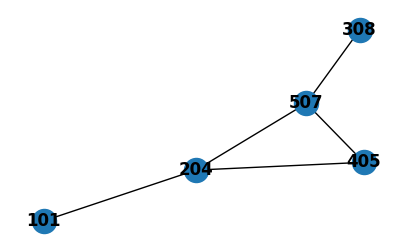

In [11]:
# Draw the citation network
fig, ax = plt.subplots(figsize=(5, 3))
nx.draw(citation_graph, with_labels=True, ax=ax, font_weight='bold')
plt.show()


## 4. An email communication network is to be built to know how many emails are exchanged between the employees.

### a. Create a multigraph for the above network from email_network.txt. The node names are strings(name of the employee).


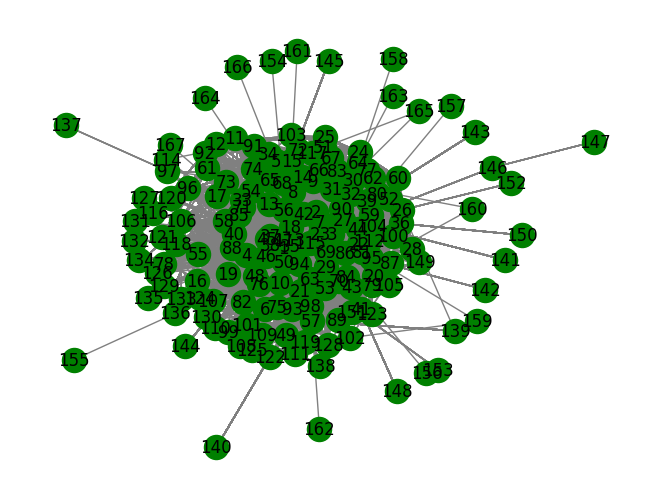

In [12]:
file_path = 'email_network_lab2.txt' 
df = pd.read_csv(file_path, delimiter='\t')

# Convert DataFrame to a list
edge_list = df[['#Sender', 'Recipient']].values.tolist()
#print(edge_list)

# Create a MultiGraph
email_network = nx.MultiGraph()
email_network.add_edges_from(edge_list)

# Draw the network 
pos = nx.kamada_kawai_layout(email_network,scale=5)
nx.draw(email_network, pos=pos, with_labels=True, node_color='Green', edge_color='gray')

### b. Find out the total number of employees and total emails in total.

In [13]:
total_employees = email_network.number_of_nodes() #get num of nodes
total_emails = email_network.number_of_edges() #get num of edges

print("Total Number of Employees:", total_employees)
print("Total Number of Emails:", total_emails)

Total Number of Employees: 167
Total Number of Emails: 82927
